<a href="https://colab.research.google.com/github/Elohokoya/Elohokoya/blob/main/Koya_Eloho_Taiwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Step 1: Load and Inspect Data ---
Dataset loaded successfully.

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 

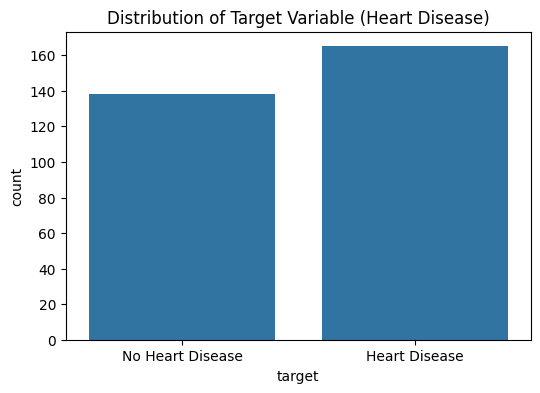

Saved: numerical_features_distribution.png


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib
import warnings
import sys

warnings.filterwarnings('ignore')

# Step 1: Load and Inspect Data
print("--- Step 1: Load and Inspect Data ---")
try:
    df = pd.read_csv('heart.csv')
    print("Dataset loaded successfully.")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    print("\nDataset Information:")
    df.info()

    print("\nMissing values per column:")
    print(df.isnull().sum())

    print("\nNumber of duplicate rows:")
    print(df.duplicated().sum())

except FileNotFoundError:
    print("Error: heart.csv not found. Please make sure the file is uploaded to your Colab environment.")
    sys.exit("Exiting due to file not found error.") # Exit if file is not found
except Exception as e:
    print(f"An error occurred during data loading or inspection: {e}")
    sys.exit(f"Exiting due to data loading error: {e}") # Exit on other errors

# Step 2: Exploratory Data Analysis (EDA)
print("\n--- Step 2: Exploratory Data Analysis (EDA) ---")

print("\nDescriptive Statistics:")
print(df.describe())

# Check the distribution of the target variable
print("\nDistribution of the 'target' variable (Heart Disease):")
print(df['target'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.savefig('target_distribution.png')
print("Saved: target_distribution.png")
plt.show()

# Distribution of numerical features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('target') # Remove target from numerical columns for distribution plots

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numerical_features_distribution.png')
print("Saved: numerical_features_distribution.png")
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.savefig('correlation_matrix.png')
print("Saved: correlation_matrix.png")
plt.show()

# Step 3: Data Preprocessing
print("\n--- Step 3: Data Preprocessing ---")

# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Identify categorical and numerical features
# 'cp', 'thal', 'slope', 'ca', 'restecg', 'exang', 'fbs' are often considered categorical in this dataset based on domain knowledge
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create a preprocessing pipeline for numerical and categorical features
# Numerical features will be scaled using StandardScaler
# Categorical features will be one-hot encoded
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify for balanced classes
print(f"Data split into training (X_train shape: {X_train.shape}, y_train shape: {y_train.shape})")
print(f"and testing sets (X_test shape: {X_test.shape}, y_test shape: {y_test.shape}).")

# Step 4: Model Development (Classification)
print("\n--- Step 4: Model Development ---")

# Model 1: Logistic Regression
print("\n--- Training Logistic Regression Model ---")
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Model 2: Random Forest Classifier
print("\n--- Training Random Forest Classifier Model ---")
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("\nRandom Forest Classifier Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nConfusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Step 5: Save the Trained Model
print("\n--- Step 5: Save the Trained Model ---")

# Choose the better performing model (e.g., Random Forest based on metrics)
# In a real scenario, you might do hyperparameter tuning and cross-validation to select the best model.
# For this example, let's save the Random Forest model.
model_filename = 'heart_disease_model.joblib'
joblib.dump(rf_pipeline, model_filename)
print(f"Trained Random Forest model saved as '{model_filename}'")

# You can load it later using:
# loaded_model = joblib.load(model_filename)
# print(f"\nModel loaded successfully: {loaded_model}")

In [ ]:
import os
print(os.listdir())

['.config', 'sample_data']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

print("\n--- Step 3: Model Development ---")

# --- 1. Select and Build an Appropriate ML Model ---

# Model 1: Logistic Regression
print("\n--- Training Logistic Regression Model ---")
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, solver='liblinear'))]) # liblinear for small datasets
lr_pipeline.fit(X_train, y_train)

# --- 2. Train and Evaluate Performance ---
y_pred_lr = lr_pipeline.predict(X_test)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Model 2: Random Forest Classifier
print("\n--- Training Random Forest Classifier Model ---")
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))]) # 100 trees
rf_pipeline.fit(X_train, y_train)

# --- 2. Train and Evaluate Performance ---
y_pred_rf = rf_pipeline.predict(X_test)

print("\nRandom Forest Classifier Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nConfusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


--- Step 3: Model Development ---

--- Training Logistic Regression Model ---

Logistic Regression Model Evaluation:
Accuracy: 0.8689
Precision: 0.8571
Recall: 0.9091
F1-Score: 0.8824

Confusion Matrix for Logistic Regression:
[[23  5]
 [ 3 30]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


--- Training Random Forest Classifier Model ---

Random Forest Classifier Model Evaluation:
Accuracy: 0.8197
Precision: 0.7750
Recall: 0.9394
F1-Score: 0.8493

Confusion Matrix for Random Forest Classifier:
[[19  9]
 [ 2 31]]

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.90      0.68      0.78